In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [15]:
df = pd.read_excel (r'C:\Users\UNIST\Desktop\ulsanpay.xlsx')
df

,가맹점ID,가맹점명,가맹점주(가입자),고객명,고객 생년월일,고객 성별,승인번호,승인시간,승인일자,거래금액,카테고리
0,MB0100025937,지XXX,여OO,김OO,1977,M,4666008,184905,20200104,95000,미용/뷰티/위생
1,MB0100026285,공XXX,박OO,남OO,1963,F,4621386,124115,20200102,2500,분식
2,MB0100026285,공XXX,박OO,송OO,1986,F,4623016,134644,20200102,7000,분식
3,MB0100026285,공XXX,박OO,김OO,1982,M,4620574,121408,20200102,8000,분식
4,MB0100026285,공XXX,박OO,조OO,1980,M,4655931,115700,20200104,17000,분식
...,...,...,...,...,...,...,...,...,...,...,...
172215,MB0100017097,참XXX,유OO,박OO,1964,F,9554670,160128,20200221,32000,일반음식점
172216,MB0100017097,참XXX,유OO,박OO,1964,F,10489249,142158,20200225,10000,일반음식점
172217,MB0100017097,참XXX,유OO,박OO,1964,F,10489435,142246,20200225,10000,일반음식점
172218,MB0100017097,참XXX,유OO,박OO,1964,F,10788886,184133,20200226,5000,일반음식점


In [22]:
## 승인일자 (yyyymmdd)의 형식을 date time (yyyy-mm-dd)로 변경

df['승인일자'] = df['승인일자'].astype(str)
df['승인일자'] = pd.to_datetime(df['승인일자'])
df2 = df.loc[0, '승인일자']
df2

Timestamp('2020-01-04 00:00:00+0000', tz='UTC')

In [27]:
## 승인일자에서 '월' 열을 추가

import datetime
df['월']= df['승인일자'].dt.month
df['일']= df['승인일자'].dt.day
df

,가맹점ID,가맹점명,가맹점주(가입자),고객명,고객 생년월일,고객 성별,승인번호,승인시간,승인일자,거래금액,카테고리,월,일
0,MB0100025937,지XXX,여OO,김OO,1977,M,4666008,184905,2020-01-04 00:00:00+00:00,95000,미용/뷰티/위생,1,4
1,MB0100026285,공XXX,박OO,남OO,1963,F,4621386,124115,2020-01-02 00:00:00+00:00,2500,분식,1,2
2,MB0100026285,공XXX,박OO,송OO,1986,F,4623016,134644,2020-01-02 00:00:00+00:00,7000,분식,1,2
3,MB0100026285,공XXX,박OO,김OO,1982,M,4620574,121408,2020-01-02 00:00:00+00:00,8000,분식,1,2
4,MB0100026285,공XXX,박OO,조OO,1980,M,4655931,115700,2020-01-04 00:00:00+00:00,17000,분식,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172215,MB0100017097,참XXX,유OO,박OO,1964,F,9554670,160128,2020-02-21 00:00:00+00:00,32000,일반음식점,2,21
172216,MB0100017097,참XXX,유OO,박OO,1964,F,10489249,142158,2020-02-25 00:00:00+00:00,10000,일반음식점,2,25
172217,MB0100017097,참XXX,유OO,박OO,1964,F,10489435,142246,2020-02-25 00:00:00+00:00,10000,일반음식점,2,25
172218,MB0100017097,참XXX,유OO,박OO,1964,F,10788886,184133,2020-02-26 00:00:00+00:00,5000,일반음식점,2,26


In [66]:
## 1월 사용 데이터만 정리

jan = df[df['월'].isin(['1'])] 
jan = jan[['승인일자','거래금액','월','일']]
jan


,승인일자,거래금액,월,일
0,2020-01-04 00:00:00+00:00,95000,1,4
1,2020-01-02 00:00:00+00:00,2500,1,2
2,2020-01-02 00:00:00+00:00,7000,1,2
3,2020-01-02 00:00:00+00:00,8000,1,2
4,2020-01-04 00:00:00+00:00,17000,1,4
...,...,...,...,...
163159,2020-01-30 00:00:00+00:00,15500,1,30
163160,2020-01-31 00:00:00+00:00,14500,1,31
163161,2020-01-22 00:00:00+00:00,18000,1,22
163162,2020-01-24 00:00:00+00:00,100000,1,24


In [68]:
## 2월 사용 데이터만 정리

feb = df[df['월'].isin(['2'])] 
feb = feb[['승인일자','거래금액','월','일']]
feb


,승인일자,거래금액,월,일
1024,2020-02-10 00:00:00+00:00,47920,2,10
1025,2020-02-10 00:00:00+00:00,3980,2,10
1026,2020-02-01 00:00:00+00:00,26000,2,1
1027,2020-02-01 00:00:00+00:00,10000,2,1
1028,2020-02-01 00:00:00+00:00,3000,2,1
...,...,...,...,...
172215,2020-02-21 00:00:00+00:00,32000,2,21
172216,2020-02-25 00:00:00+00:00,10000,2,25
172217,2020-02-25 00:00:00+00:00,10000,2,25
172218,2020-02-26 00:00:00+00:00,5000,2,26


In [70]:
## 1월 1주차 사용 데이터만 정리 (1~5일 / 월~일 기준)

# jan_1 = df[df['월'].isin(['1']) & df['일'].isin(['1','2','3','4','5'])]
jan_1 = jan[jan['일'].isin(['1','2','3','4','5'])]
jan_1

# 질문) 1~5는 1에서 5까지 1씩 늘어나는 규칙을 가졌는데, 1:1:5 같은 방법으로 쭉 불러오는 방법은 없나?

,승인일자,거래금액,월,일
0,2020-01-04 00:00:00+00:00,95000,1,4
1,2020-01-02 00:00:00+00:00,2500,1,2
2,2020-01-02 00:00:00+00:00,7000,1,2
3,2020-01-02 00:00:00+00:00,8000,1,2
4,2020-01-04 00:00:00+00:00,17000,1,4
...,...,...,...,...
56527,2020-01-01 00:00:00+00:00,22000,1,1
56528,2020-01-02 00:00:00+00:00,30000,1,2
56529,2020-01-04 00:00:00+00:00,15000,1,4
56533,2020-01-03 00:00:00+00:00,21000,1,3


In [71]:
## 1월 2주차 사용 데이터만 정리 (6~12일 / 월~일 기준)

jan_2 = jan[jan['일'].isin(['6','7','8','9','10','11','12'])] 
jan_2

,승인일자,거래금액,월,일
5,2020-01-07 00:00:00+00:00,12000,1,7
6,2020-01-07 00:00:00+00:00,3000,1,7
8,2020-01-06 00:00:00+00:00,9500,1,6
9,2020-01-07 00:00:00+00:00,19000,1,7
10,2020-01-07 00:00:00+00:00,6000,1,7
...,...,...,...,...
109861,2020-01-12 00:00:00+00:00,136720,1,12
109869,2020-01-12 00:00:00+00:00,39690,1,12
109875,2020-01-12 00:00:00+00:00,34260,1,12
109879,2020-01-11 00:00:00+00:00,2900,1,11


In [72]:
## 1월 3주차 사용 데이터만 정리 (13~19일 / 월~일 기준)

jan_3 = jan[jan['일'].isin(['13','14','15','16','17','18','19'])] 
jan_3

,승인일자,거래금액,월,일
56538,2020-01-19 00:00:00+00:00,12000,1,19
56540,2020-01-15 00:00:00+00:00,6000,1,15
56541,2020-01-19 00:00:00+00:00,3500,1,19
56542,2020-01-19 00:00:00+00:00,9500,1,19
56544,2020-01-18 00:00:00+00:00,5000,1,18
...,...,...,...,...
109882,2020-01-17 00:00:00+00:00,10000,1,17
109886,2020-01-14 00:00:00+00:00,5000,1,14
109887,2020-01-15 00:00:00+00:00,10000,1,15
109888,2020-01-16 00:00:00+00:00,9000,1,16


In [73]:
## 1월 4주차 사용 데이터만 정리 (20~26 / 월~일 기준)

jan_4 = jan[jan['일'].isin(['20','21','22','23','24','25','26'])] 
jan_4

,승인일자,거래금액,월,일
56537,2020-01-20 00:00:00+00:00,2000,1,20
56546,2020-01-20 00:00:00+00:00,11500,1,20
56561,2020-01-20 00:00:00+00:00,10000,1,20
56568,2020-01-20 00:00:00+00:00,102000,1,20
56571,2020-01-20 00:00:00+00:00,8000,1,20
...,...,...,...,...
163156,2020-01-23 00:00:00+00:00,19000,1,23
163158,2020-01-22 00:00:00+00:00,63000,1,22
163161,2020-01-22 00:00:00+00:00,18000,1,22
163162,2020-01-24 00:00:00+00:00,100000,1,24


In [74]:
## 1월 5주차 사용 데이터만 정리 (27~31 / 월~일 기준)

jan_5 = jan[jan['일'].isin(['27','28','29','30','31'])] 
jan_5

,승인일자,거래금액,월,일
109892,2020-01-30 00:00:00+00:00,5000,1,30
109893,2020-01-28 00:00:00+00:00,9000,1,28
109894,2020-01-29 00:00:00+00:00,6000,1,29
109895,2020-01-29 00:00:00+00:00,11000,1,29
109897,2020-01-30 00:00:00+00:00,7000,1,30
...,...,...,...,...
163152,2020-01-30 00:00:00+00:00,69840,1,30
163154,2020-01-30 00:00:00+00:00,3900,1,30
163157,2020-01-30 00:00:00+00:00,14000,1,30
163159,2020-01-30 00:00:00+00:00,15500,1,30


In [75]:
## 2월 1주차 사용 데이터만 정리 (1~5일 / 월~일 기준)

feb_1 = feb[feb['일'].isin(['1','2'])]
feb_1

,승인일자,거래금액,월,일
1026,2020-02-01 00:00:00+00:00,26000,2,1
1027,2020-02-01 00:00:00+00:00,10000,2,1
1028,2020-02-01 00:00:00+00:00,3000,2,1
1029,2020-02-02 00:00:00+00:00,10000,2,2
1044,2020-02-01 00:00:00+00:00,3200,2,1
...,...,...,...,...
163900,2020-02-01 00:00:00+00:00,7000,2,1
163903,2020-02-01 00:00:00+00:00,9500,2,1
163904,2020-02-02 00:00:00+00:00,13900,2,2
163905,2020-02-02 00:00:00+00:00,7200,2,2


In [76]:
## 2월 2주차 사용 데이터만 정리 (1~5일 / 월~일 기준)

feb_2 = feb[feb['일'].isin(['3','4','5','6','7','8','9'])]
feb_2

,승인일자,거래금액,월,일
1030,2020-02-03 00:00:00+00:00,4500,2,3
1031,2020-02-04 00:00:00+00:00,3000,2,4
1032,2020-02-05 00:00:00+00:00,23000,2,5
1033,2020-02-05 00:00:00+00:00,4000,2,5
1034,2020-02-07 00:00:00+00:00,8650,2,7
...,...,...,...,...
163929,2020-02-03 00:00:00+00:00,10000,2,3
163930,2020-02-04 00:00:00+00:00,10000,2,4
163931,2020-02-07 00:00:00+00:00,6400,2,7
163932,2020-02-08 00:00:00+00:00,40000,2,8


In [77]:
## 2월 3주차 사용 데이터만 정리 (1~5일 / 월~일 기준)

feb_3 = feb[feb['일'].isin(['10','11','12','13','14','15','16'])] 
feb_3

,승인일자,거래금액,월,일
1024,2020-02-10 00:00:00+00:00,47920,2,10
1025,2020-02-10 00:00:00+00:00,3980,2,10
1042,2020-02-10 00:00:00+00:00,13000,2,10
1043,2020-02-10 00:00:00+00:00,3000,2,10
1094,2020-02-10 00:00:00+00:00,5000,2,10
...,...,...,...,...
163841,2020-02-10 00:00:00+00:00,11900,2,10
163867,2020-02-10 00:00:00+00:00,14000,2,10
163891,2020-02-10 00:00:00+00:00,240000,2,10
163892,2020-02-10 00:00:00+00:00,150000,2,10


In [79]:
## 2월 4주차 사용 데이터만 정리 (1~5일 / 월~일 기준)

feb_4 = feb[feb['일'].isin(['17','18','19','20','21','22','23'])] 
feb_4

,승인일자,거래금액,월,일
60238,2020-02-19 00:00:00+00:00,15000,2,19
60242,2020-02-20 00:00:00+00:00,3000,2,20
60243,2020-02-18 00:00:00+00:00,10000,2,18
60248,2020-02-18 00:00:00+00:00,7000,2,18
60249,2020-02-20 00:00:00+00:00,14500,2,20
...,...,...,...,...
172203,2020-02-21 00:00:00+00:00,19900,2,21
172207,2020-02-23 00:00:00+00:00,10000,2,23
172208,2020-02-21 00:00:00+00:00,22000,2,21
172209,2020-02-22 00:00:00+00:00,16000,2,22


In [80]:
## 2월 5주차 사용 데이터만 정리 (1~5일 / 월~일 기준)

feb_5 = feb[feb['일'].isin(['24','25','26','27','28','29'])] 
feb_5

,승인일자,거래금액,월,일
123498,2020-02-25 00:00:00+00:00,200,2,25
123500,2020-02-29 00:00:00+00:00,16400,2,29
123502,2020-02-27 00:00:00+00:00,10000,2,27
123505,2020-02-29 00:00:00+00:00,56000,2,29
123508,2020-02-28 00:00:00+00:00,13000,2,28
...,...,...,...,...
172214,2020-02-26 00:00:00+00:00,29500,2,26
172216,2020-02-25 00:00:00+00:00,10000,2,25
172217,2020-02-25 00:00:00+00:00,10000,2,25
172218,2020-02-26 00:00:00+00:00,5000,2,26


In [82]:
"""
위의 변수 설명

jan = 1월 사용
feb = 2월 사용
X_1 = 1주차
x_2 = 2주차
X_3 = 3주차
X_4 = 4주차
X_5 = 5주차
"""

'\n위의 변수 설명\njan = 1월 사용\nfeb = 2월 사용\nX_1 = 1주차\nx_2 = 2주차\nX_3 = 3주차\nX_4 = 4주차\nX_5 = 5주차\n'

In [101]:
# 월 별 누적 거래금액

price_jan = jan['거래금액'].sum (axis = 0)
price_feb = feb['거래금액'].sum(axis = 0)


,월,누적 거래금액(원)
0,1월,2739788559
1,2월,2564412600


In [126]:
# 주 별 누적 거래금액
price_1 = jan_1['거래금액'].sum (axis = 0) + feb_1['거래금액'].sum (axis = 0)
price_2 = jan_2['거래금액'].sum (axis = 0) + feb_2['거래금액'].sum (axis = 0)
price_3 = jan_3['거래금액'].sum (axis = 0) + feb_3['거래금액'].sum (axis = 0)
price_4 = jan_4['거래금액'].sum (axis = 0) + feb_4['거래금액'].sum (axis = 0)
price_5 = jan_5['거래금액'].sum (axis = 0) + feb_5['거래금액'].sum (axis = 0)

Result_price = {'주': ['1주차','2주차','3주차','4주차','5주차','총 합계']
               ,'1월': [jan_1['거래금액'].sum (axis = 0),jan_2['거래금액'].sum (axis = 0),jan_3['거래금액'].sum (axis = 0),jan_4['거래금액'].sum (axis = 0),jan_5['거래금액'].sum (axis = 0),jan['거래금액'].sum (axis = 0)]
                    ,'2월' : [feb_1['거래금액'].sum (axis = 0),feb_2['거래금액'].sum (axis = 0),feb_3['거래금액'].sum (axis = 0),feb_4['거래금액'].sum (axis = 0),feb_5['거래금액'].sum (axis = 0),feb['거래금액'].sum(axis = 0)]
                     ,'누적 거래금액 (원)': [price_1,price_2,price_3,price_4,price_5,jan['거래금액'].sum (axis = 0)+feb['거래금액'].sum(axis = 0)]}
Result_price = pd.DataFrame(Result_price)
Result_price

,주,1월,2월,누적 거래금액 (원)
0,1주차,519809926,211318450,731128376
1,2주차,713022216,707366624,1420388840
2,3주차,587994807,646982585,1234977392
3,4주차,523079418,609784563,1132863981
4,5주차,395882192,388960378,784842570
5,총 합계,2739788559,2564412600,5304201159


In [192]:
# 주 별 누적 거래금액
price_1 = jan_1['거래금액'].sum (axis = 0) + feb_1['거래금액'].sum (axis = 0)
price_2 = jan_2['거래금액'].sum (axis = 0) + feb_2['거래금액'].sum (axis = 0)
price_3 = jan_3['거래금액'].sum (axis = 0) + feb_3['거래금액'].sum (axis = 0)
price_4 = jan_4['거래금액'].sum (axis = 0) + feb_4['거래금액'].sum (axis = 0)
price_5 = jan_5['거래금액'].sum (axis = 0) + feb_5['거래금액'].sum (axis = 0)

Result_price = {'주': ['1주차','2주차','3주차','4주차','5주차','총 합계']
               ,'1월': [jan_1['거래금액'].sum (axis = 0)/100000000,jan_2['거래금액'].sum (axis = 0)/100000000,jan_3['거래금액'].sum (axis = 0)/100000000,jan_4['거래금액'].sum (axis = 0)/100000000,jan_5['거래금액'].sum (axis = 0)/100000000,jan['거래금액'].sum (axis = 0)/100000000]
                    ,'2월' : [feb_1['거래금액'].sum (axis = 0)/100000000,feb_2['거래금액'].sum (axis = 0)/100000000,feb_3['거래금액'].sum (axis = 0)/100000000,feb_4['거래금액'].sum (axis = 0)/100000000,feb_5['거래금액'].sum (axis = 0)/100000000,feb['거래금액'].sum(axis = 0)/100000000]
                     ,'누적 거래금액 (억원)': [price_1/100000000,price_2/100000000,price_3/100000000,price_4/100000000,price_5/100000000,(jan['거래금액'].sum (axis = 0)+feb['거래금액'].sum(axis = 0))/100000000]}
Result_price = pd.DataFrame(Result_price)
Result_price

,주,1월,2월,누적 거래금액 (억원)
0,1주차,5.198099,2.113185,7.311284
1,2주차,7.130222,7.073666,14.203888
2,3주차,5.879948,6.469826,12.349774
3,4주차,5.230794,6.097846,11.328640
4,5주차,3.958822,3.889604,7.848426
5,총 합계,27.397886,25.644126,53.042012


<ipython-input-195-d5f82e914011>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


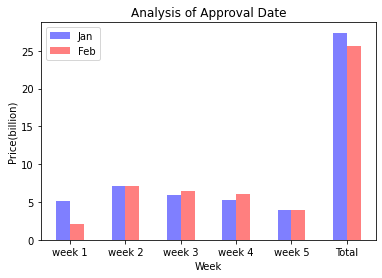

In [195]:
index = np.arange(len(Result_price))
alpha = 0.5
width = 0.25

p1 = plt.bar(index-width/2,Result_price["1월"], width = width, color = 'b',alpha = alpha)
p2 = plt.bar(index+width/2,Result_price["2월"], width = width, color = 'r',alpha = alpha)
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['week 1','week 2','week 3','week 4','week 5','Total'])
plt.title ('Analysis of Approval Date')
plt.ylabel('Price(billion)')
plt.xlabel('Week')
plt.legend((p1[0],p2[1]),('Jan','Feb'))
plt.show()

<ipython-input-206-d9f61e2c1245>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


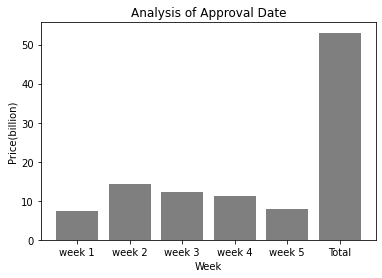

In [206]:
index = np.arange(len(Result_price))
alpha = 0.5
width = 0.8

p1 = plt.bar(index,Result_price.loc[:,'누적 거래금액 (억원)'], width = width, color = 'k', alpha = alpha)
ax=plt.subplot()
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['week 1','week 2','week 3','week 4','week 5','Total'])
plt.title ('Analysis of Approval Date')
plt.ylabel('Price(billion)')
plt.xlabel('Week')

plt.show()

# 1월,2월 전체 합산